In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "2"
tf_device = '/gpu:2'

In [3]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from uncertainty_from_distance import uncertainty_from_distances
import matplotlib.pyplot as plt
from sampling_unc import sample_uniform
from attack import attack_fn
from sampling_unc import sample_high_unc
from scipy import stats

2022-06-16 12:02:43.051699: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-16 12:02:43.051735: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
(ds_train, ds_test), ds_info = tfds.load(
    'cifar100',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(16)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(16)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

2022-06-16 12:04:15.539349: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-06-16 12:04:15.539395: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (KOR-C-000WM): /proc/driver/nvidia/version does not exist
2022-06-16 12:04:15.540378: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
new_model = tf.keras.models.load_model('cifar100_resnet20.pb')

def model(input):
    print(tf.shape(input))
    input = tf.transpose(input, perm = [0, 3, 1, 2])
    output = new_model(test_input = tf.slice(input, [0, 0, 0, 0], [16, 3, 32, 32]))['test_output']
    if tf.shape(input)[0] != 16:
        i = 1
        while i < tf.shape(input)[0] // 16:
            output = tf.concat([output, new_model(test_input = tf.slice(input, [16*i, 0, 0, 0], [16, 3, 32, 32]))['test_output']], axis = 0)
            i = i + 1
    else:
        ouput = new_model(test_input = input)['test_output']
    print(tf.shape(output))
    return tf.nn.softmax(output)

In [14]:
from uncertainty_from_distance import uncertainty_from_distances

In [17]:
distance_obj = uncertainty_from_distances(model, 16, 20, 32, 3)

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dty

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=int32)
tf.Tensor([16 32 32  3], shape=(4,), dtype=int32)
tf.Tensor([ 16 100], shape=(2,), dtype=i

/home/price/miniconda3/envs/rnd1/lib/python3.8/site-packages/scipy/stats/_entropy.py:72: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=axis, keepdims=True)


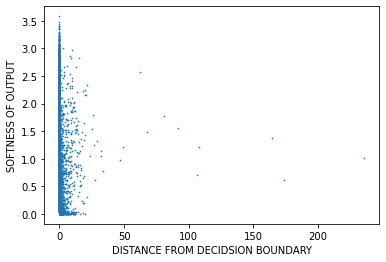

<Figure size 432x288 with 0 Axes>

In [19]:
unc_list = np.array([0])
soft_list = np.zeros([1, 100])
for (imgs, labels) in ds_test:
    outs = model(imgs)
    soft_list = np.append(soft_list, model(imgs), axis = 0)
    unc_list = np.append(unc_list, tf.make_ndarray(tf.make_tensor_proto(distance_obj.get_uncertainty(imgs))), axis = 0)
soft_list = stats.entropy(soft_list, axis = 1)

plt.scatter(unc_list, soft_list, s = 0.45)
plt.xlabel('DISTANCE FROM DECIDSION BOUNDARY')
plt.ylabel('SOFTNESS OF OUTPUT')
plt.show()
plt.savefig('cifar100_unc_vs_soft.png')

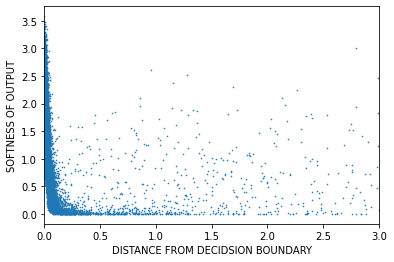

<Figure size 432x288 with 0 Axes>

In [22]:
plt.scatter(unc_list, soft_list, s = 0.35)
plt.xlabel('DISTANCE FROM DECIDSION BOUNDARY')
plt.ylabel('SOFTNESS OF OUTPUT')
plt.xlim(0, 3)
plt.show()
plt.savefig('cifar100_unc_vs_soft.png')